In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
#from ridgeplot import ridgeplot
import joypy
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.stats.api as sms

In [67]:
#generam datele de venit

n_observations = 100000

#normal distributed scenario
# mean_income = 10000
# std_income = 3000
# incomes = np.random.normal(loc=mean_income, scale=std_income,size=n_observations)

#uniform distributed
low_param = 2000
high_param = 25000
incomes = np.random.uniform(low=low_param, high=high_param,size=n_observations)

df = pd.DataFrame({'income':incomes})
df


,income
0,24343.819533
1,12151.781812
2,16304.328363
3,12813.702453
4,3615.813778
...,...
99995,8050.232250
99996,6965.331957
99997,15032.183405
99998,23646.968171


c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income', ylabel='Count'>

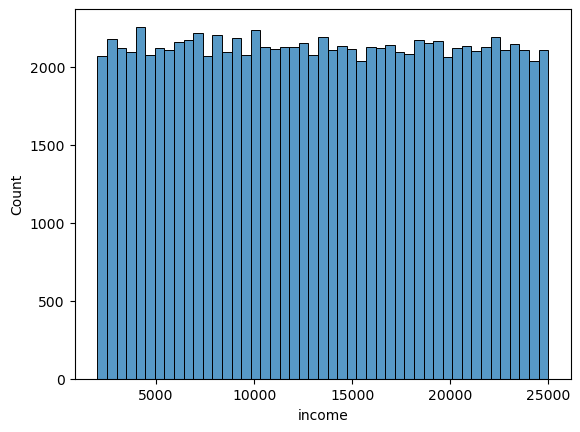

In [68]:
sns.histplot(data=df, x='income')

In [69]:
b0 = 1000
b1 = 0.6
error_mean = 0
error_std = 500

def generate_consumtion(x: float, beta0: float, beta1: float, error_mean: float, error_std: float)->float:
    y = beta0 + beta1*x + np.random.normal(loc=error_mean, scale=error_std)
    return y


def generate_consumtion_v2(x: float, beta0: float, beta1: float, error_mean: float, error_std: float)->float:
    #generam o un error_std in functie de x, cu cat x e mai mare, varianta erorilor va creste
    error_std_updated = x*0.0005*error_std
    y = beta0 + beta1*x + np.random.normal(loc=error_mean, scale=error_std_updated)
    return y


def generate_consumtion_v3(x: float, beta0: float, beta1: float, error_mean: float, error_std: float)->float:
    #
    error_mean_updated = error_mean
    if (x > 7000) & (x < 9000):
        error_mean_updated = error_mean + x*0.3
    if (x > 9000) & (x <11000):
        error_mean_updated = error_mean - x*0.3
    y = beta0 + beta1*x + np.random.normal(loc=error_mean_updated, scale=error_std)
    return y


def generate_consumtion_v4(x: float, beta0: float, beta1: float, error_mean: float, error_std: float)->float:
    #generam valori random pentru media erorii si pentru varianta ei
    error_mean_updated = np.random.uniform(-200,200)
    error_std_updated = np.random.uniform(0,800)
    if x>17000:
        error_mean_updated = abs(error_mean_updated) + x*0.5 #introducem un trend de deplasare a erorilor DOAR pentru valori mari
    y = beta0 + beta1*x + np.random.normal(loc=error_mean_updated, scale=error_std_updated)
    return y

def generate_consumtion_v5(x: float, beta0: float, beta1: float, error_mean: float, error_std: float)->float:
    #adaugam non liniaritate
    # Introduce non-linearity by adding a quadratic term
    income_squared = x ** 2
    y = beta0 + ( beta1 * x + 0.1 * income_squared + np.random.normal(error_mean, error_std))/10000
    #y = beta0 + beta1*x + np.random.normal(loc=error_mean, scale=error_std) 
    return y



In [72]:
df['consumption_v1'] = df['income'].apply(generate_consumtion, args=(b0, b1, error_mean, error_std))
df['consumption_v2'] = df['income'].apply(generate_consumtion_v2, args=(b0, b1, error_mean, error_std))
df['consumption_v3'] = df['income'].apply(generate_consumtion_v3, args=(b0, b1, error_mean, error_std))
df['consumption_v4'] = df['income'].apply(generate_consumtion_v4, args=(b0, b1, error_mean, error_std))
df['consumption_v5'] = df['income'].apply(generate_consumtion_v5, args=(b0, b1, error_mean, error_std))

df.head()

,income,consumption_v1,consumption_v2,consumption_v3,consumption_v4,consumption_v5
0,24343.819533,15926.377398,13445.959235,15433.293377,27970.337189,6927.643471
1,12151.781812,8471.756641,8126.182021,8595.416814,7382.213316,2477.412153
2,16304.328363,10874.950065,3679.214729,11335.509875,10773.901370,3659.351497
3,12813.702453,8499.378239,5835.956392,7605.466577,9285.115150,2642.679225
4,3615.813778,2799.697030,3833.460395,2682.509795,3196.162010,1130.990477


In [73]:
#definim cazurile de consum
scenarii_simulate_versiuni = [1,2,3,4,5]
scenarii_simulate_denumiri = [f'consumption_v{i}' for i in scenarii_simulate_versiuni]


In [75]:
#estimam 4 modele pentru cele 4 relatii
df_sample = df.sample(1000)
df_sample['intercept'] = 1
print(f"Rezultate modele estimate\n")
for scenariu in scenarii_simulate_versiuni:
    formula = f"consumption_v{scenariu}~income"
    nume_model = f'model_v{scenariu}'
    globals()[nume_model] = smf.ols(formula=formula,data=df_sample).fit()
    print(f"Versiunea {scenariu}:\n")
    print(eval(nume_model).summary())
    print("\n\n")


Rezultate modele estimate

Versiunea 1:

                            OLS Regression Results                            
Dep. Variable:         consumption_v1   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 6.780e+04
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:32:13   Log-Likelihood:                -7608.4
No. Observations:                1000   AIC:                         1.522e+04
Df Residuals:                     998   BIC:                         1.523e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

In [76]:
#scriem predictiile
for scenariu in scenarii_simulate_versiuni:
    nume_model = f'model_v{scenariu}'
    df[f"pred_v{scenariu}"] = globals()[nume_model].predict(df['income'])


#calculam erorile
for scenariu in scenarii_simulate_versiuni:
    df[f"error_v{scenariu}"] = df[f'consumption_v{scenariu}'] - df[f'pred_v{scenariu}']

df.head()

,income,consumption_v1,consumption_v2,consumption_v3,consumption_v4,consumption_v5,pred_v1,pred_v2,pred_v3,pred_v4,pred_v5,error_v1,error_v2,error_v3,error_v4,error_v5
0,24343.819533,15926.377398,13445.959235,15433.293377,27970.337189,6927.643471,15610.182410,15406.367042,15543.673232,26431.102610,6184.300056,316.194989,-1960.407807,-110.379854,1539.234579,743.343415
1,12151.781812,8471.756641,8126.182021,8595.416814,7382.213316,2477.412153,8258.191264,8148.863058,8267.170536,11205.865458,2904.950991,213.565377,-22.681037,328.246278,-3823.652142,-427.538838
2,16304.328363,10874.950065,3679.214729,11335.509875,10773.901370,3659.351497,10762.242364,10620.732308,10745.510652,16391.504435,4021.880741,112.707700,-6941.517579,589.999224,-5617.603065,-362.529245
3,12813.702453,8499.378239,5835.956392,7605.466577,9285.115150,2642.679225,8657.339856,8542.881827,8662.220768,12032.462206,3082.990863,-157.961617,-2706.925435,-1056.754191,-2747.347056,-440.311638
4,3615.813778,2799.697030,3833.460395,2682.509795,3196.162010,1130.990477,3110.867836,3067.692590,3172.698569,546.274288,608.991986,-311.170806,765.767805,-490.188773,2649.887723,521.998491


c:\Users\octav\anaconda3\envs\econometrie-avansata\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income', ylabel='Count'>

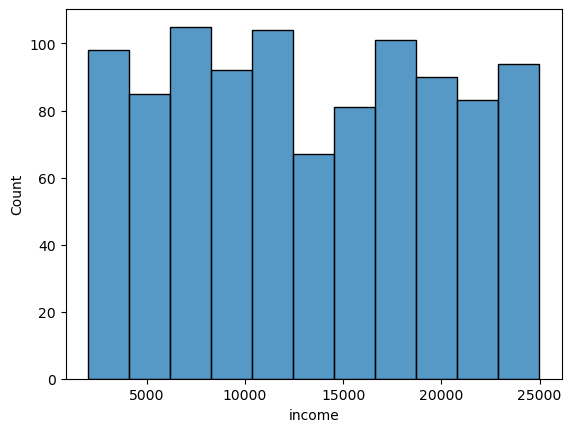

In [77]:
sns.histplot(data=df_sample, x='income')

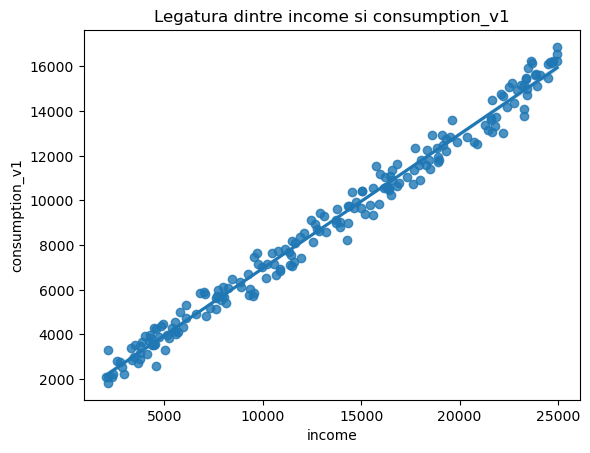

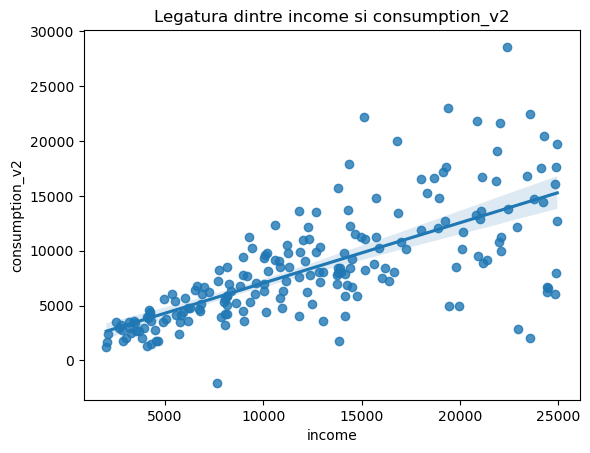

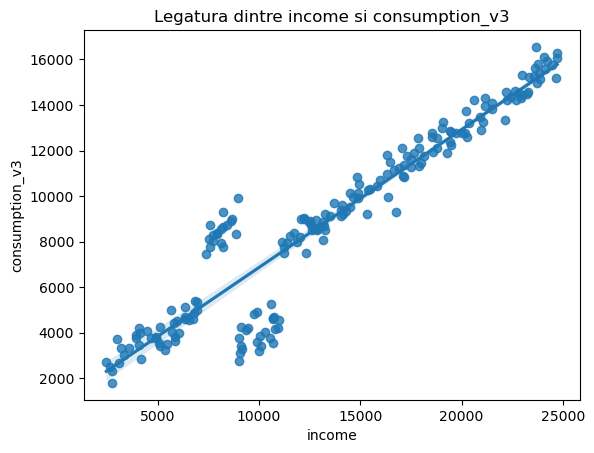

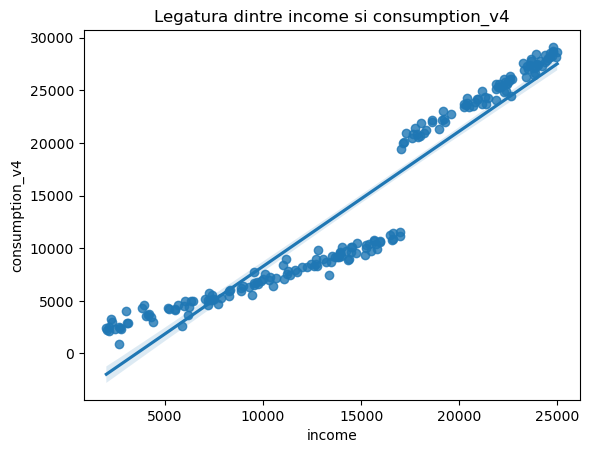

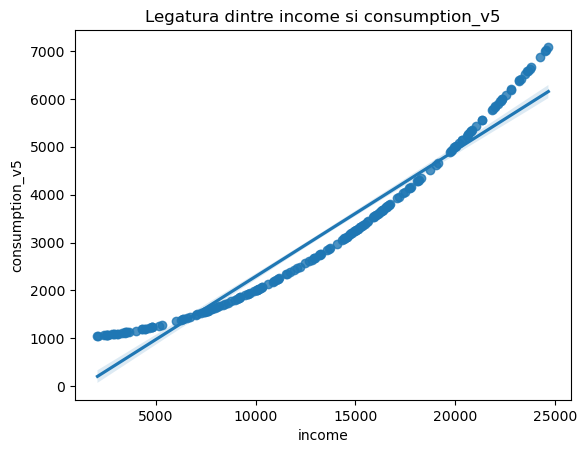

In [78]:
#liniaritate

for scenariu in scenarii_simulate_denumiri:
    relationship_plot = sns.regplot(data=df.sample(200), x='income',y=scenariu)
    relationship_plot.set_title(f"Legatura dintre income si {scenariu}")
    plt.show()


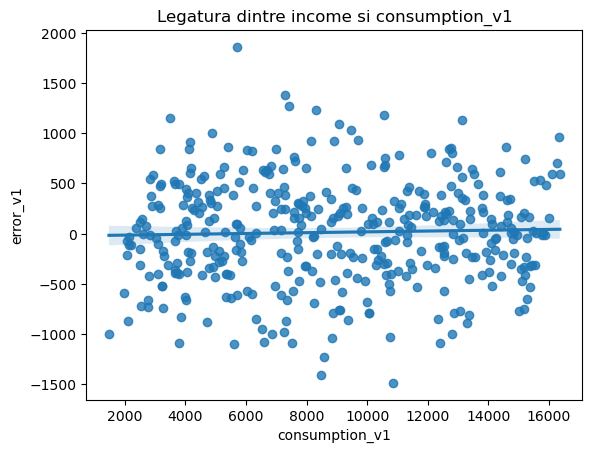

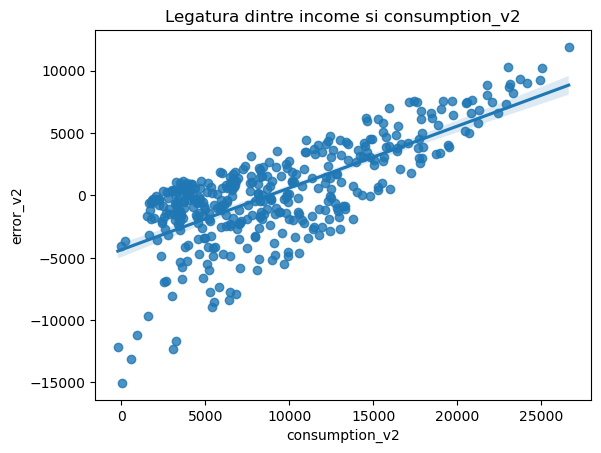

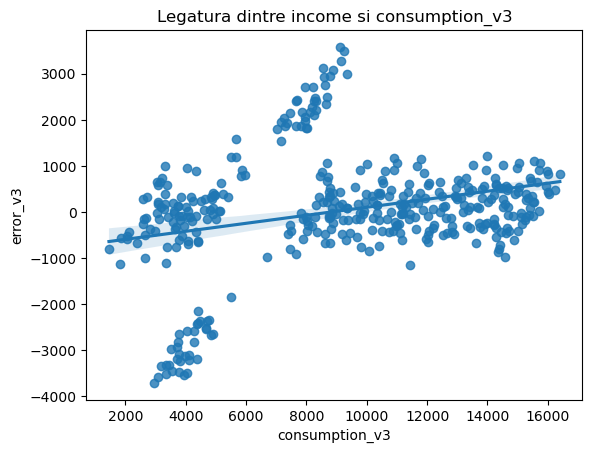

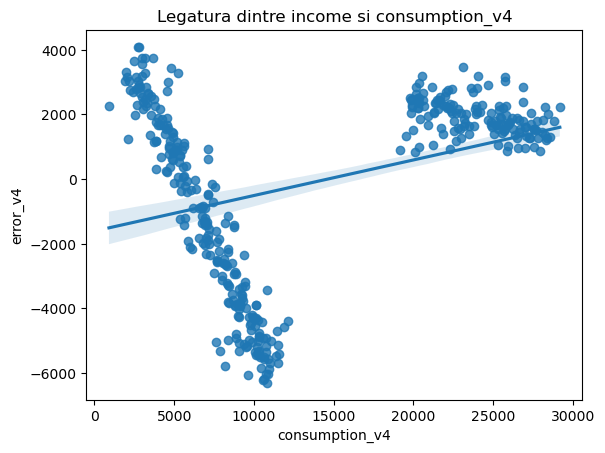

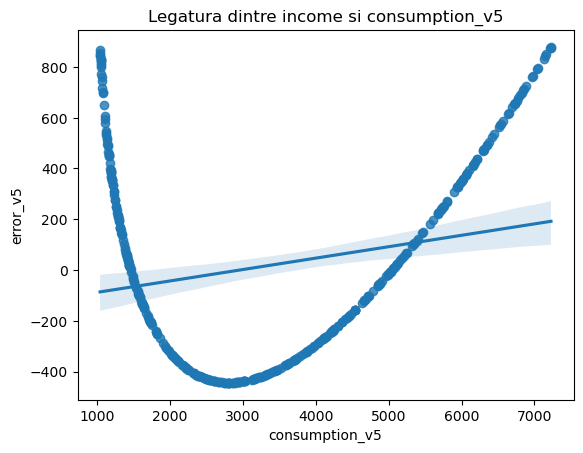

In [79]:
#liniaritate

for scenariu in scenarii_simulate_versiuni:
    relationship_plot = sns.regplot(data=df.sample(400), x=f"consumption_v{scenariu}",y=f"error_v{scenariu}")
    #rainbow_statistic, rainbow_pv = linear_rainbow(eval(f"model_v{scenariu}"))
    #title = f"Legatura dintre income si consumption_v{scenariu}, rainbow pv: {rainbow_pv.round(3)}"
    title = f"Legatura dintre income si consumption_v{scenariu}"
    relationship_plot.set_title(title)
    plt.show()


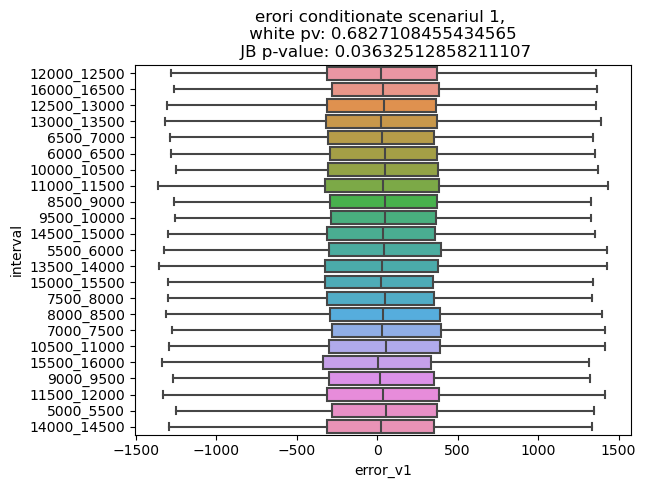

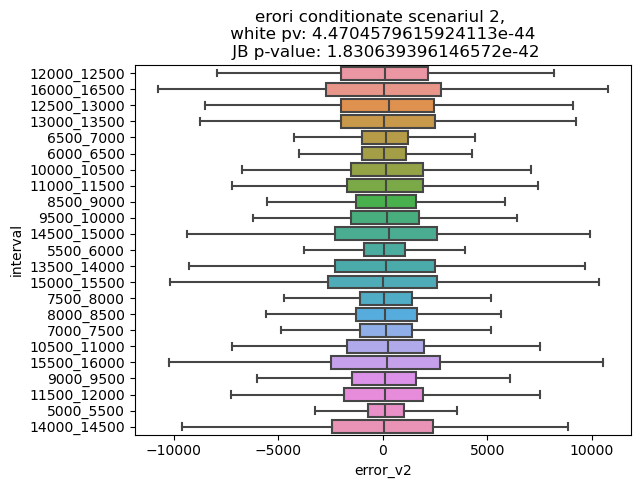

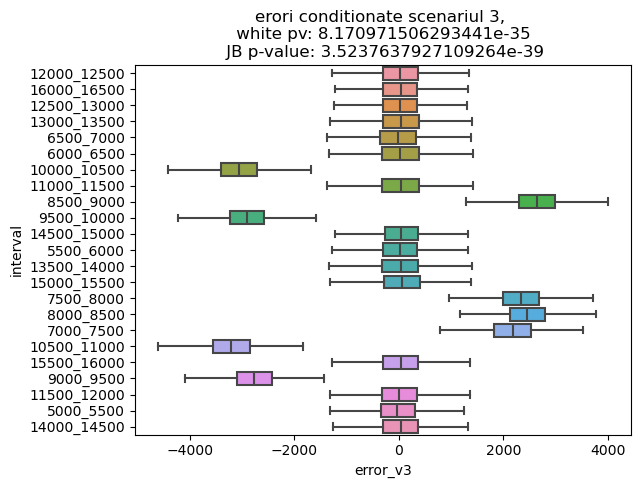

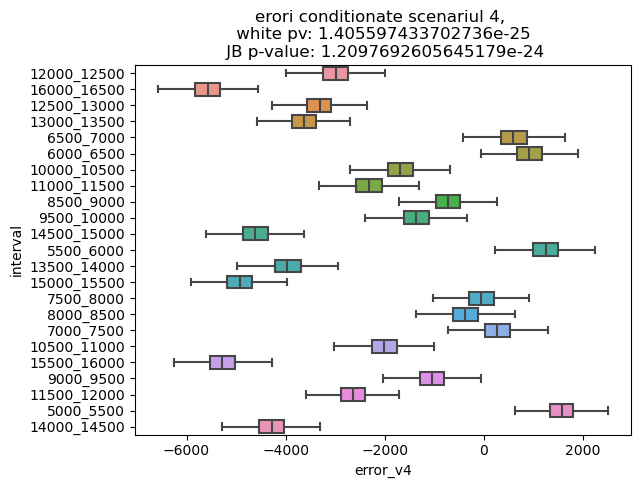

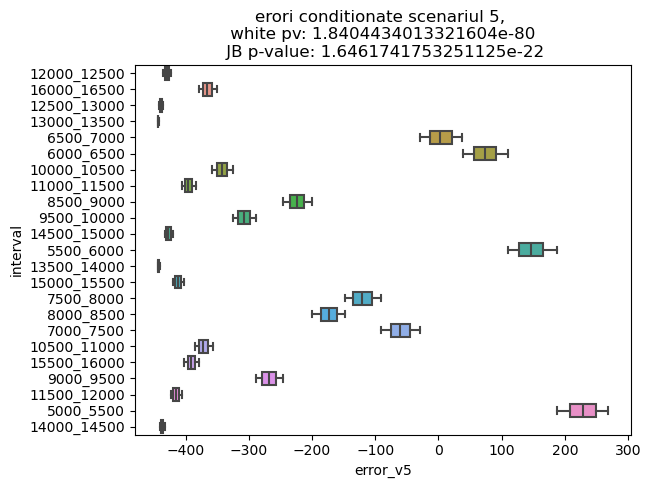

In [80]:
#Define the bins and labels
bins = range(2000, 30001, 500)
labels = [f"{i}_{i+500}" for i in range(2000, 30000, 500)]

# Add a new column with the interval labels
df['interval_income'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)

for scenariu in scenarii_simulate_versiuni:
    #definim un doar un subset de intervale x pentru care sa vizualizam

    residuals = globals()[f"model_v{scenariu}"].resid
    
    #Jarque-Berra
    jarque_bera_test = sms.jarque_bera(residuals)
    # print("Test statistic:", jarque_bera_test[0])
    # print("p-value:", jarque_bera_test[1])

    #white test:
    
    white_test = het_white(residuals, df_sample[['intercept','income']])
    # print("White Test Statistic:", white_test[0])
    # print("p-value:", white_test[1])
    
    df_sample2 = df[df['income'].between(5000,16500)].copy() #pot fi schimbate 5000 si 6000 cu alte valori
    df_sample2['interval'] = df_sample2['interval_income'].astype('str')
    erori_conditionat_boxplot = sns.boxplot(data=df_sample2, y='interval',x=f"error_v{scenariu}", showfliers=False)
    erori_conditionat_boxplot.set_title(f"erori conditionate scenariul {scenariu}, \n white pv: {white_test[1]} \n JB p-value: {jarque_bera_test[1]}")
    plt.show()




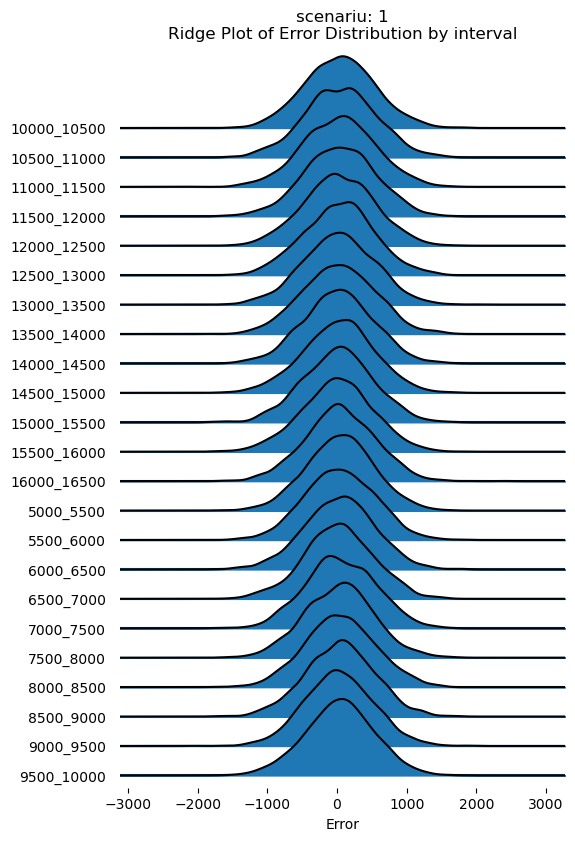

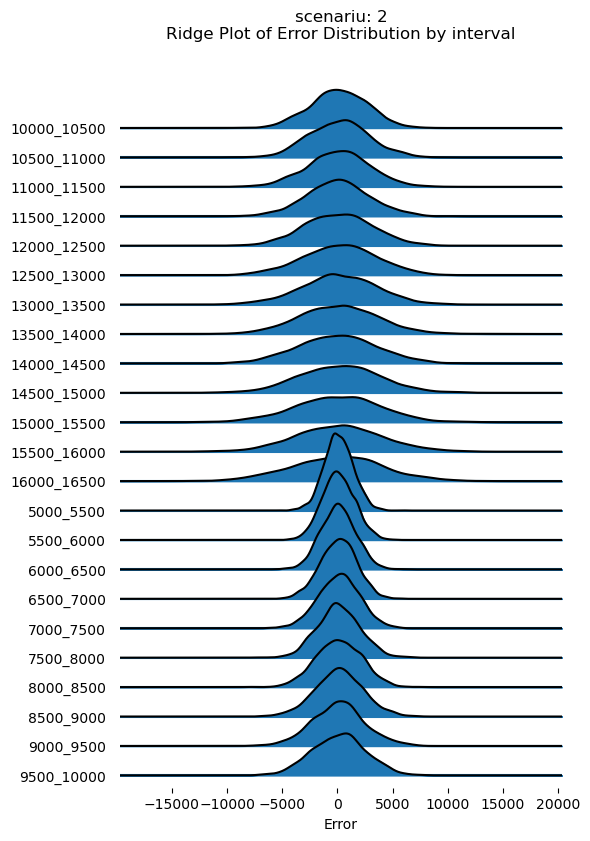

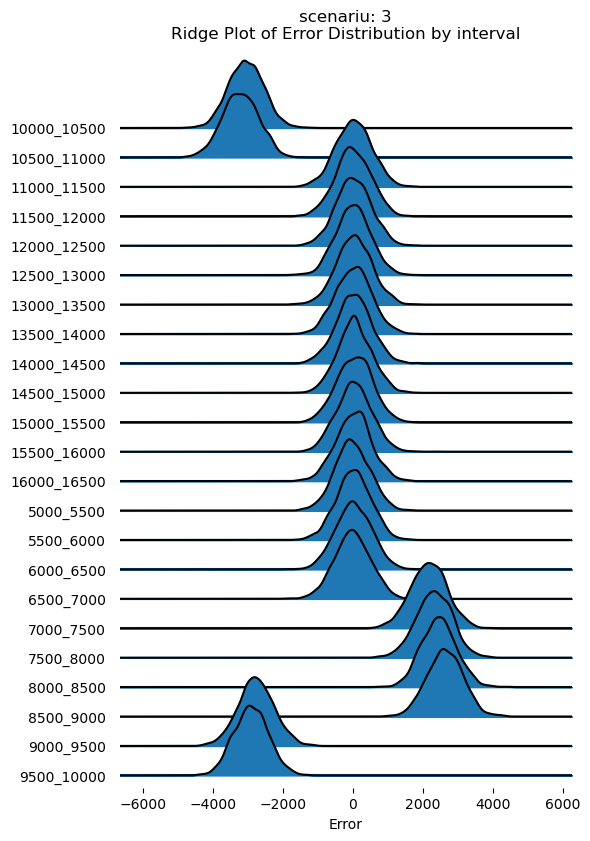

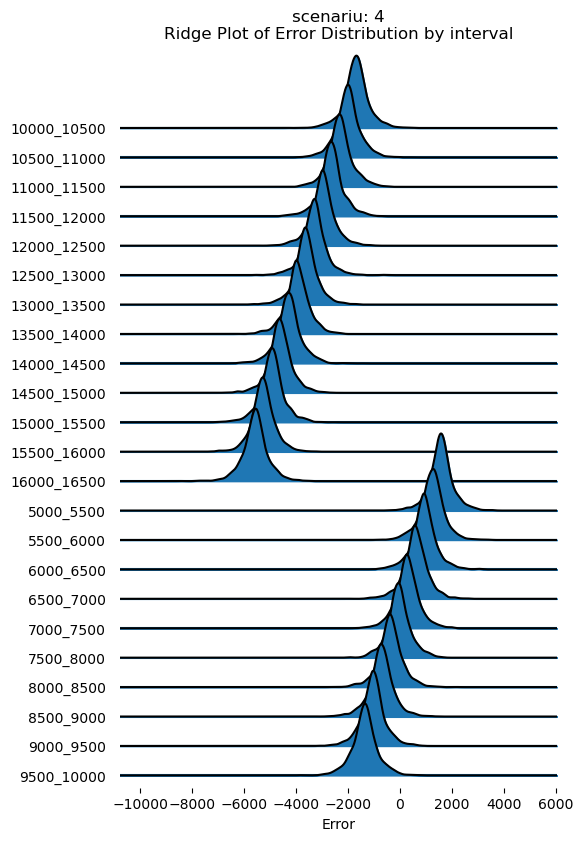

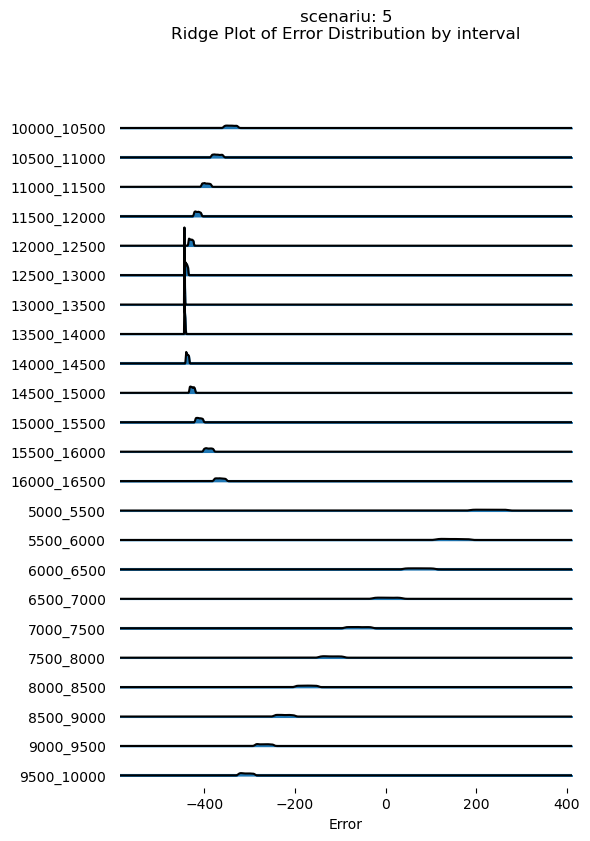

In [81]:
for scenariu in scenarii_simulate_versiuni:

    #Create a ridge plot using joypy
    fig, axes = joypy.joyplot(df_sample2, by="interval", column=f"error_v{scenariu}", figsize=(6, 8))

    # Customize the plot if needed
    plt.title(f"scenariu: {scenariu}\nRidge Plot of Error Distribution by interval")
    plt.xlabel("Error")
    plt.ylabel("Label")
    plt.show()

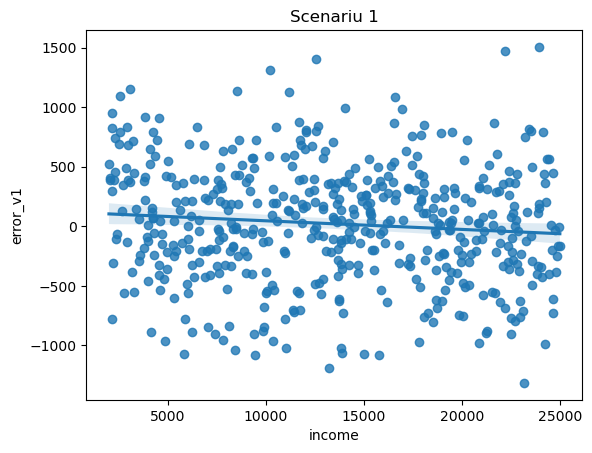

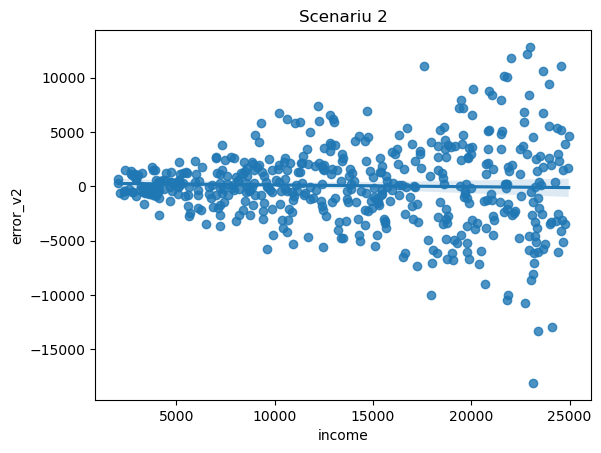

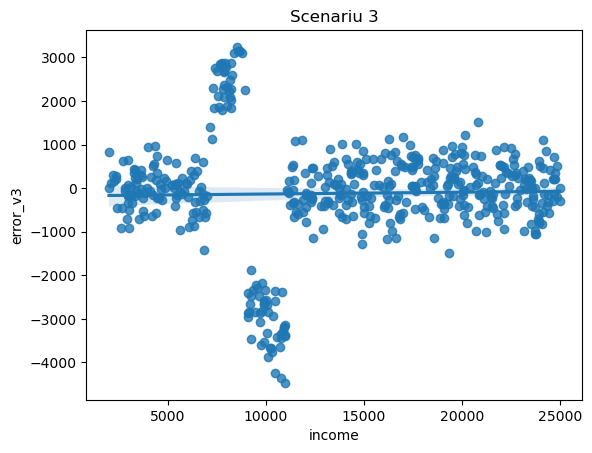

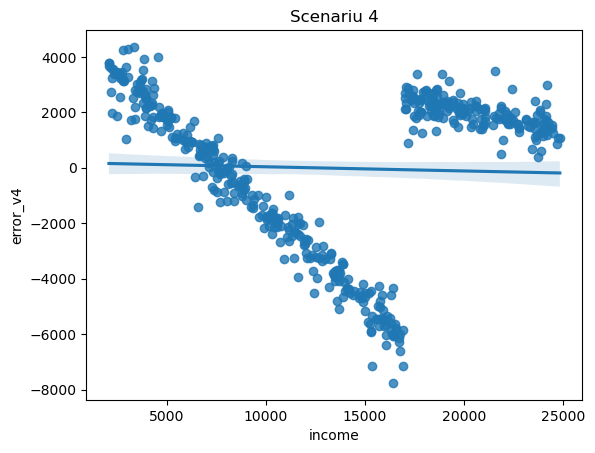

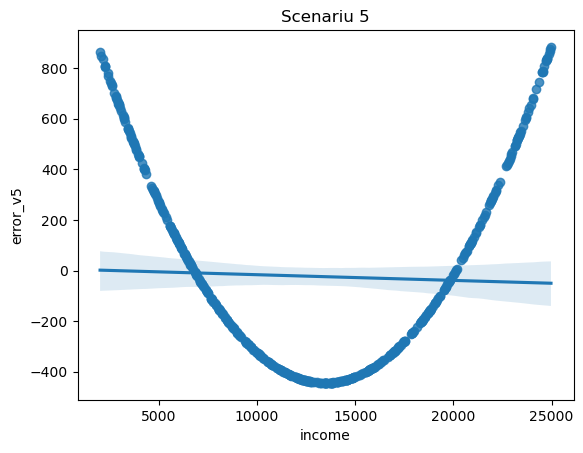

In [82]:
#variabile corelate cu erorile
for scenariu in scenarii_simulate_versiuni:
    scatter_plot_errors_x = relationship_plot = sns.regplot(data=df.sample(500), x='income',y=f'error_v{scenariu}')
    scatter_plot_errors_x.set_title(f'Scenariu {scenariu}')
    plt.show()